# Import Dependencies and Setup

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

In [43]:
# Create path to CSV loan data
lo_path = Path("Resources/loan_df.csv")

# Read in the CSV
ld_df = pd.read_csv(lo_path)

In [45]:
# Display the data
ld_df

,observation_date,Number of Cars Sold,Number of Cars Made,Loan_Owned_by_Financial_Companies,MVL_Owned_Securitized,Avg_Fin_Rate_48,Avg_Fin_Rate_60,Median_CPI
0,4/1/2008,4913667,301000.00,260852.32,798.14,6.90,6.92,2.92
1,7/1/2008,4511667,342266.67,259759.63,801.68,6.92,6.94,3.37
2,10/1/2008,3600000,271766.67,250770.31,777.28,7.06,7.12,1.50
3,1/1/2009,2901000,132300.00,233774.93,755.68,6.92,6.96,2.15
4,4/1/2009,3195333,149900.00,226383.24,742.02,6.79,6.93,1.30
...,...,...,...,...,...,...,...,...
56,4/1/2022,1982667,141600.00,446933.52,1445.20,5.15,4.85,7.15
57,7/1/2022,1996667,149000.00,449503.27,1476.91,5.52,5.50,7.76
58,10/1/2022,2144333,141666.67,459331.37,1499.49,6.94,6.55,6.44
59,1/1/2023,2149000,147400.00,469482.80,1516.36,7.46,7.48,6.98


In [61]:
# Change the 
ld_df['observation_date'] = pd.to_datetime(cl_df['observation_date'], format='%Y-%m-%d')
ld_df.head()

,observation_date,Number of Cars Sold,Number of Cars Made,Loan_Owned_by_Financial_Companies,MVL_Owned_Securitized,Avg_Fin_Rate_48,Avg_Fin_Rate_60,Median_CPI
0,2008-04-01,4913667,301000.00,260852.32,798.14,6.90,6.92,2.92
1,2008-07-01,4511667,342266.67,259759.63,801.68,6.92,6.94,3.37
2,2008-10-01,3600000,271766.67,250770.31,777.28,7.06,7.12,1.50
3,2009-01-01,2901000,132300.00,233774.93,755.68,6.92,6.96,2.15
4,2009-04-01,3195333,149900.00,226383.24,742.02,6.79,6.93,1.30


In [48]:
# Make a copy of the DataFrame
own_df = ld_df.copy()

In [73]:
#own_df = pd.DataFrame({'Observation Date': observation_date,
                                   #'Number of Cars Sold': 'Number of Cars Sold',
                                   #'Number of Cars Made': 'Number of Cars Made',
                                   #'Loans Owned by Financial Companies': Loan_Owned_by_Financial_Companies,
                                   #'Auto Loans Owned and Securitized': MVL_Owned_Securitized,
                                   #'Average Finance Rate on 48 Month Auto Loans': Avg_Fin_Rate_48,
                                   #'Average Finance Rate on 60 Month Auto Loans': Avg_Fin_Rate_60,
                                   #'Median CPI': Median_CPI})

own_df = own_df.rename(columns={'observation_date': 'Observation Date', 
                                'Loan_Owned_by_Financial_Companies' : 'Loans Owned by Financial Companies',
                                'MVL_Owned_Securitized' : 'Auto Loans Owned and Securitized',
                                'Avg_Fin_Rate_48' : 'Average Finance Rate on 48 Month Auto Loans',
                                'Avg_Fin_Rate_60' : 'Average Finance Rate on 60 Month Auto Loans',
                                'Median_CPI' : 'Median CPI'})
own_df.head()

,Observation Date,Number of Cars Sold,Number of Cars Made,Loans Owned by Financial Companies,Auto Loans Owned and Securitized,Average Finance Rate on 48 Month Auto Loans,Average Finance Rate on 60 Month Auto Loans,Median CPI
0,2008,4913667,301000.00,260852.32,798.14,6.90,6.92,2.92
1,2008,4511667,342266.67,259759.63,801.68,6.92,6.94,3.37
2,2008,3600000,271766.67,250770.31,777.28,7.06,7.12,1.50
3,2009,2901000,132300.00,233774.93,755.68,6.92,6.96,2.15
4,2009,3195333,149900.00,226383.24,742.02,6.79,6.93,1.30


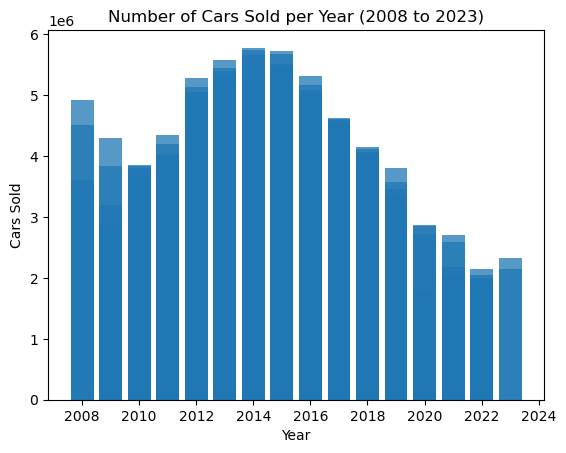

In [50]:
# Build scatter plot for latitude vs. temperature
plt.bar(own_df["observation_date"], own_df["Number of Cars Sold"], alpha=0.75)

# Incorporate the other graph properties
plt.title("Number of Cars Sold per Year (2008 to 2023)")
plt.xlabel("Year")
plt.ylabel("Cars Sold")

# Show plot
plt.show()

In [75]:
summary_statistics = own_df.describe()
print(summary_statistics)

       Observation Date  Number of Cars Sold  Number of Cars Made  \
count         61.000000         6.100000e+01            61.000000   
mean        2015.377049         4.064230e+06        249813.661475   
std            4.454077         1.201579e+06         83119.804494   
min         2008.000000         1.791333e+06         63733.330000   
25%         2012.000000         3.195333e+06        197900.000000   
50%         2015.000000         4.113000e+06        236200.000000   
75%         2019.000000         5.140333e+06        330766.670000   
max         2023.000000         5.780000e+06        369833.330000   

       Loans Owned by Financial Companies  Auto Loans Owned and Securitized  \
count                           61.000000                         61.000000   
mean                        317967.033770                       1017.276721   
std                          64010.726975                        243.329275   
min                         215855.580000                     

## 1. Correlation between Finance Rate and Auto Loans Owned and Securitized before and                after Covid

In [79]:
# Create new dataframes for dates before and after the pandemic
before_covid_df = own_df[(own_df['Observation Date'] >= 2008) & (own_df['Observation Date'] <= 2019)]
after_covid_df = own_df[(own_df['Observation Date'] >= 2021) & (own_df['Observation Date'] <= 2023)]

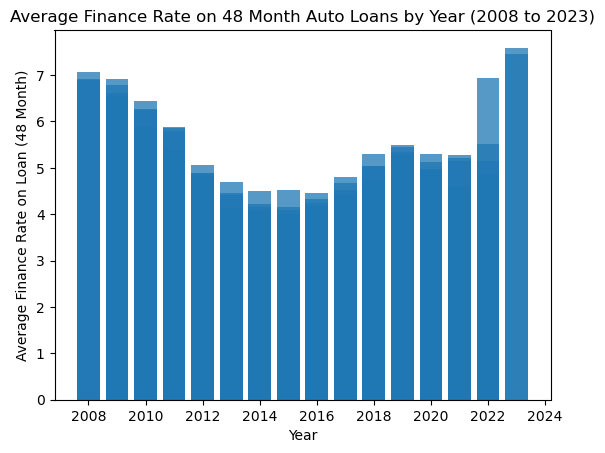

In [130]:
# Build scatter plot for latitude vs. temperature
plt.bar(own_df["Observation Date"], own_df['Average Finance Rate on 48 Month Auto Loans'], alpha=0.75)

# Incorporate the other graph properties
plt.title("Average Finance Rate on 48 Month Auto Loans by Year (2008 to 2023)")
plt.xlabel("Year")
plt.ylabel("Average Finance Rate on Loan (48 Month)")

# Show plot
plt.show()

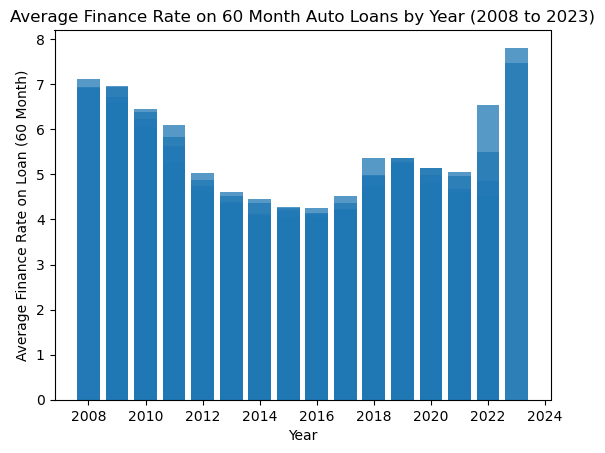

In [131]:
# Build scatter plot for latitude vs. temperature
plt.bar(own_df["Observation Date"], own_df['Average Finance Rate on 60 Month Auto Loans'], alpha=0.75)

# Incorporate the other graph properties
plt.title("Average Finance Rate on 60 Month Auto Loans by Year (2008 to 2023)")
plt.xlabel("Year")
plt.ylabel("Average Finance Rate on Loan (60 Month)")

# Show plot
plt.show()

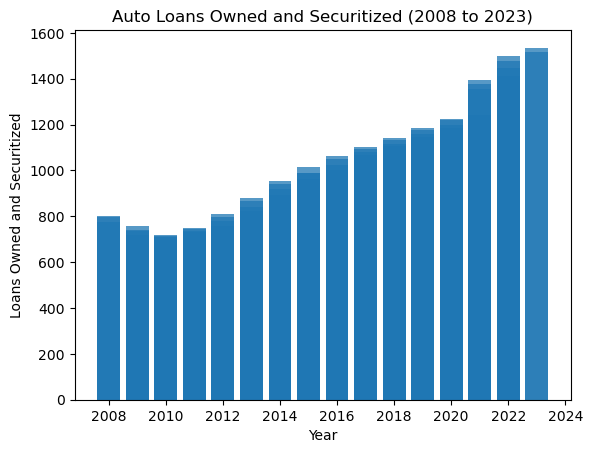

In [120]:
# Build scatter plot for latitude vs. temperature
plt.bar(own_df["Observation Date"], own_df['Auto Loans Owned and Securitized'], alpha=0.75)

# Incorporate the other graph properties
plt.title("Auto Loans Owned and Securitized (2008 to 2023)")
plt.xlabel("Year")
plt.ylabel("Loans Owned and Securitized")

# Show plot
plt.show()

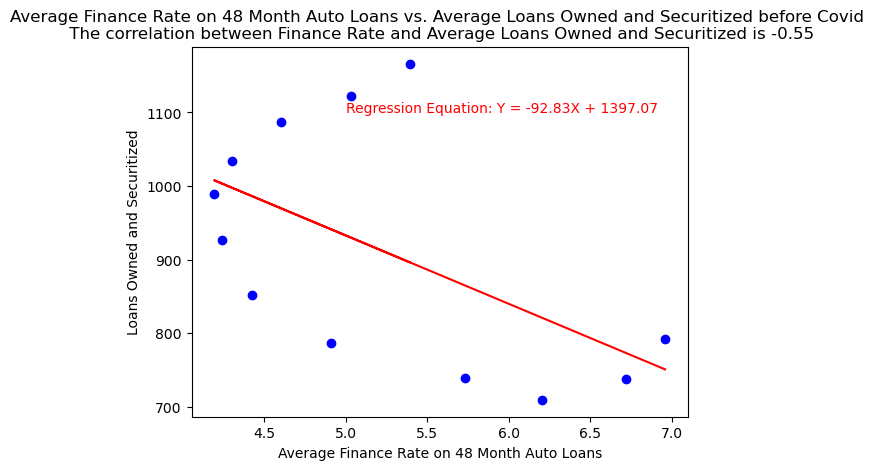

In [136]:
# Take the average of Auto Loans Owned and Securitized and Average Finance Rate on 48 Month Auto Loans in two separate variables
average_loans_owned = before_covid_df.groupby('Observation Date')['Auto Loans Owned and Securitized'].mean()
avg_fin_48_b4 = before_covid_df.groupby('Observation Date')['Average Finance Rate on 48 Month Auto Loans'].mean()

# Calculate the correlation coefficient 
correlation = (st.pearsonr(average_loans_owned,avg_fin_48_b4)[0])
correlation = round(correlation, 2)

# Create a scatter plot of loans vs. finance rate
plt.scatter(avg_fin_48_b4, average_loans_owned, marker='o', color='blue')

# Create the linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(avg_fin_48_b4, average_loans_owned)

# Create the regression line (y=mx+b)
regress_values = slope * avg_fin_48_b4 + intercept
plt.plot(avg_fin_48_b4, regress_values, color='red')

# Set labels and title, include the correlation coefficient and regression equation
plt.xlabel('Average Finance Rate on 48 Month Auto Loans')
plt.ylabel('Loans Owned and Securitized')
plt.title(f'Average Finance Rate on 48 Month Auto Loans vs. Average Loans Owned and Securitized before Covid \n The correlation between Finance Rate and Average Loans Owned and Securitized is {correlation}')

equation_text = f"Regression Equation: Y = {round(slope, 2)}X + {round(intercept, 2)}"
plt.annotate(equation_text, (5,1100), fontsize=10, color="red")

# Show the plot
plt.show()

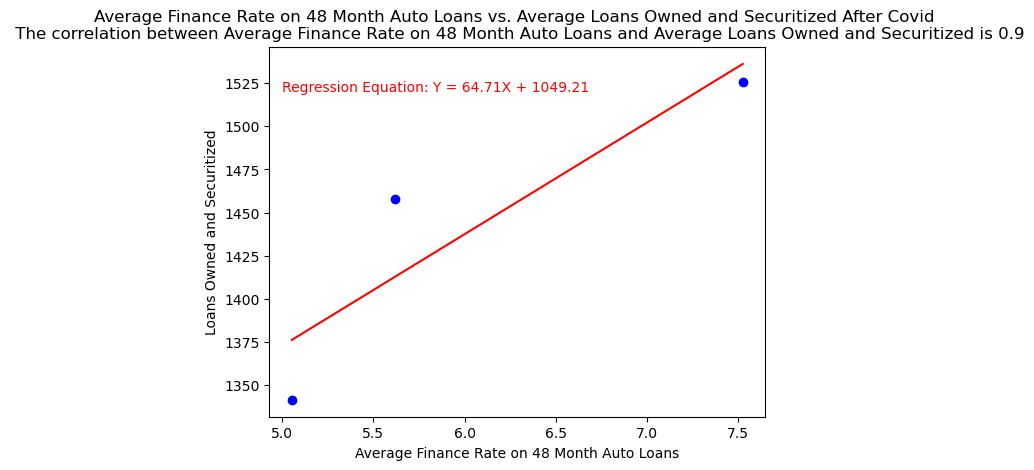

In [134]:
# Take the average of Auto Loans Owned and Securitized and Average Finance Rate on 48 Month Auto Loans in two separate variables
average_loans_owned = after_covid_df.groupby('Observation Date')['Auto Loans Owned and Securitized'].mean()
fin_48 = after_covid_df.groupby('Observation Date')['Average Finance Rate on 48 Month Auto Loans'].mean()

# Calculate the correlation coefficient 
correlation = (st.pearsonr(average_loans_owned,fin_48)[0])
correlation = round(correlation, 2)

# Create a scatter plot of loans vs. finance rate
plt.scatter(fin_48, average_loans_owned, marker='o', color='blue')

# Create the linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(fin_48, average_loans_owned)

# Create the regression line (y=mx+b)
regress_values = slope * fin_48 + intercept
plt.plot(fin_48, regress_values, color='red')

# Set labels and title, include the correlation coefficient and regression equation
plt.xlabel('Average Finance Rate on 48 Month Auto Loans')
plt.ylabel('Loans Owned and Securitized')
plt.title(f'Average Finance Rate on 48 Month Auto Loans vs. Average Loans Owned and Securitized After Covid \n The correlation between Average Finance Rate on 48 Month Auto Loans and Average Loans Owned and Securitized is {correlation}')

equation_text = f"Regression Equation: Y = {round(slope, 2)}X + {round(intercept, 2)}"
plt.annotate(equation_text, (5,1520), fontsize=10, color="red")

# Show the plot
plt.show()

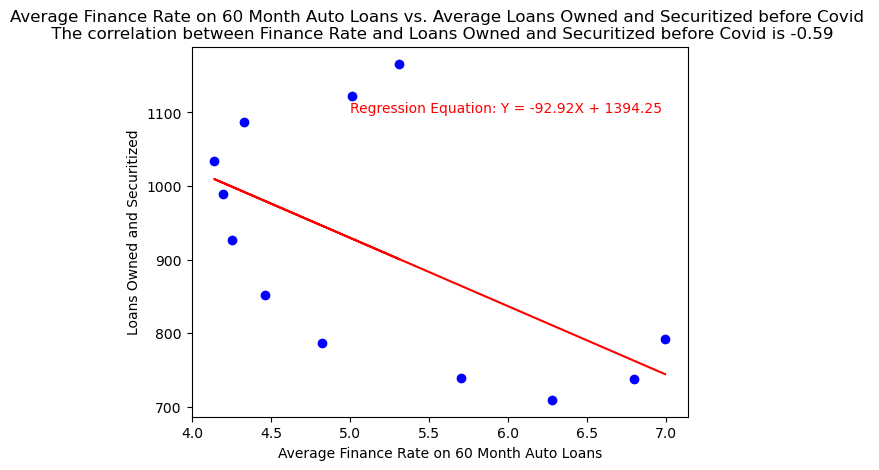

In [118]:
# Take the average of Auto Loans Owned and Securitized and Average Finance Rate on 60 Month Auto Loans in two separate variables
average_loans_owned = before_covid_df.groupby('Observation Date')['Auto Loans Owned and Securitized'].mean()
avg_fin_60_b4 = before_covid_df.groupby('Observation Date')['Average Finance Rate on 60 Month Auto Loans'].mean()

# Calculate the correlation coefficient 
correlation = (st.pearsonr(average_loans_owned,avg_fin_60_b4)[0])
correlation = round(correlation, 2)

# Create a scatter plot of loans vs. finance rate
plt.scatter(avg_fin_60_b4, average_loans_owned, marker='o', color='blue')

# Create the linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(avg_fin_60_b4, average_loans_owned)

# Create the regression line (y=mx+b)
regress_values = slope * avg_fin_60_b4 + intercept
plt.plot(avg_fin_60_b4, regress_values, color='red')

# Set labels and title, include the correlation coefficient and regression equation
plt.xlabel('Average Finance Rate on 60 Month Auto Loans')
plt.ylabel('Loans Owned and Securitized')
plt.title(f'Average Finance Rate on 60 Month Auto Loans vs. Average Loans Owned and Securitized before Covid \n The correlation between Finance Rate and Loans Owned and Securitized before Covid is {correlation}')

equation_text = f"Regression Equation: Y = {round(slope, 2)}X + {round(intercept, 2)}"
plt.annotate(equation_text, (5,1100), fontsize=10, color="red")

# Show the plot
plt.show()

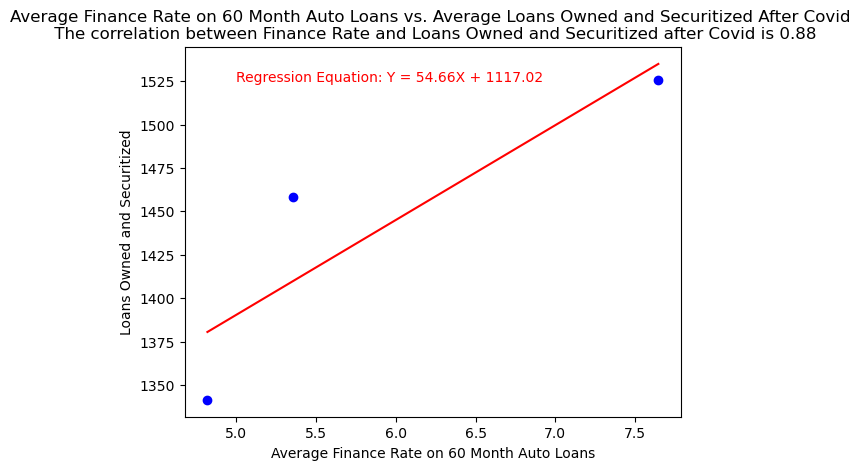

In [121]:
# Take the average of tumor and mouse weight in two separate variables
average_loans_owned = after_covid_df.groupby('Observation Date')['Auto Loans Owned and Securitized'].mean()
fin_60 = after_covid_df.groupby('Observation Date')['Average Finance Rate on 60 Month Auto Loans'].mean()

# Calculate the correlation coefficient 
correlation = (st.pearsonr(average_loans_owned,fin_60)[0])
correlation = round(correlation, 2)

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(fin_60, average_loans_owned, marker='o', color='blue')

# Create the linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(fin_60, average_loans_owned)

# Create the regression line (y=mx+b)
regress_values = slope * fin_60 + intercept
plt.plot(fin_60, regress_values, color='red')

# Set labels and title, include the correlation coefficient and regression equation
plt.xlabel('Average Finance Rate on 60 Month Auto Loans')
plt.ylabel('Loans Owned and Securitized')
plt.title(f'Average Finance Rate on 60 Month Auto Loans vs. Average Loans Owned and Securitized After Covid \n The correlation between Finance Rate and Loans Owned and Securitized after Covid is {correlation}')

equation_text = f"Regression Equation: Y = {round(slope, 2)}X + {round(intercept, 2)}"
plt.annotate(equation_text, (5,1525), fontsize=10, color="red")

# Show the plot
plt.show()

## 2. Correlation between CPI and Loans Owned by Financial Companies before/after Covid

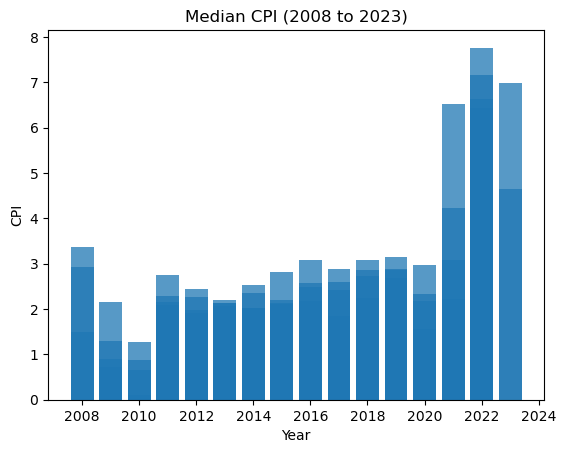

In [125]:
# Build scatter plot for Observation Date vs. Median CPI
plt.bar(own_df["Observation Date"], own_df['Median CPI'], alpha=0.75)

# Incorporate the other graph properties
plt.title("Median CPI (2008 to 2023)")
plt.xlabel("Year")
plt.ylabel("CPI")

# Show plot
plt.show()

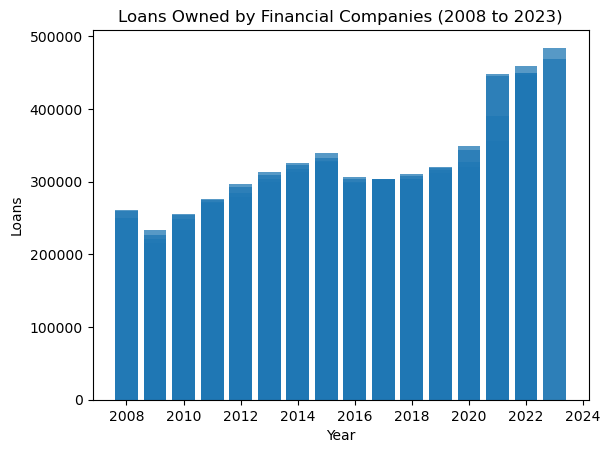

In [126]:
# Build scatter plot for Observation Date vs. Median CPI
plt.bar(own_df["Observation Date"], own_df['Loans Owned by Financial Companies'], alpha=0.75)

# Incorporate the other graph properties
plt.title("Loans Owned by Financial Companies (2008 to 2023)")
plt.xlabel("Year")
plt.ylabel("Loans")

# Show plot
plt.show()

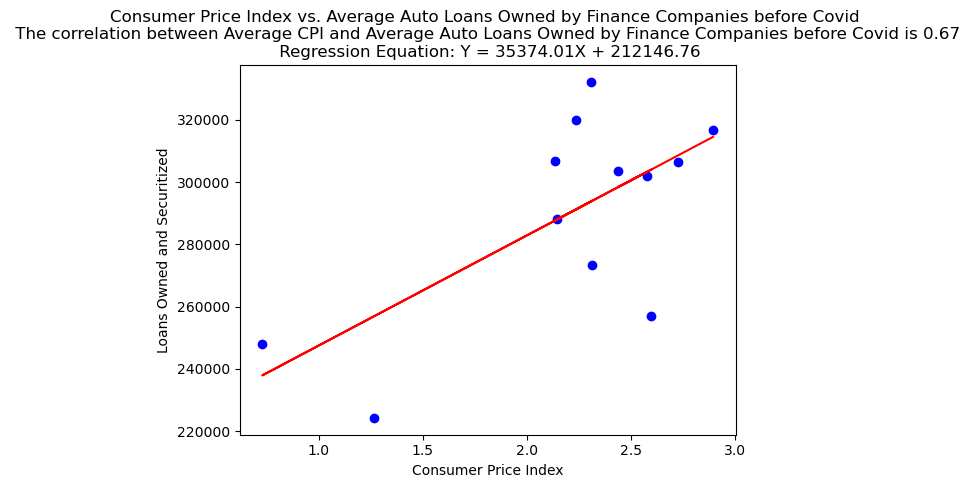

In [135]:
# Take the average of tumor and mouse weight in two separate variables
average_loans_owned = before_covid_df.groupby('Observation Date')['Loans Owned by Financial Companies'].mean()
average_cpi = before_covid_df.groupby('Observation Date')['Median CPI'].mean()

# Calculate the correlation coefficient
correlation = (st.pearsonr(average_loans_owned,average_cpi)[0])
correlation = round(correlation, 2)

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(average_cpi, average_loans_owned, marker='o', color='blue')

# Create the linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(average_cpi, average_loans_owned)

# Create the regression line (y=mx+b)
regress_values = slope * average_cpi + intercept
plt.plot(average_cpi, regress_values, color='red')

equation_text = f"Regression Equation: Y = {round(slope, 2)}X + {round(intercept, 2)}"
plt.annotate(equation_text, (0.5,1525), fontsize=10, color="red")

# Set labels and title, include the correlation coefficient and regression equation
plt.xlabel('Consumer Price Index')
plt.ylabel('Loans Owned and Securitized')
plt.title(f'Consumer Price Index vs. Average Auto Loans Owned by Finance Companies before Covid \n The correlation between Average CPI and Average Auto Loans Owned by Finance Companies before Covid is {correlation} \n {equation_text}')

# Show the plot
plt.show()

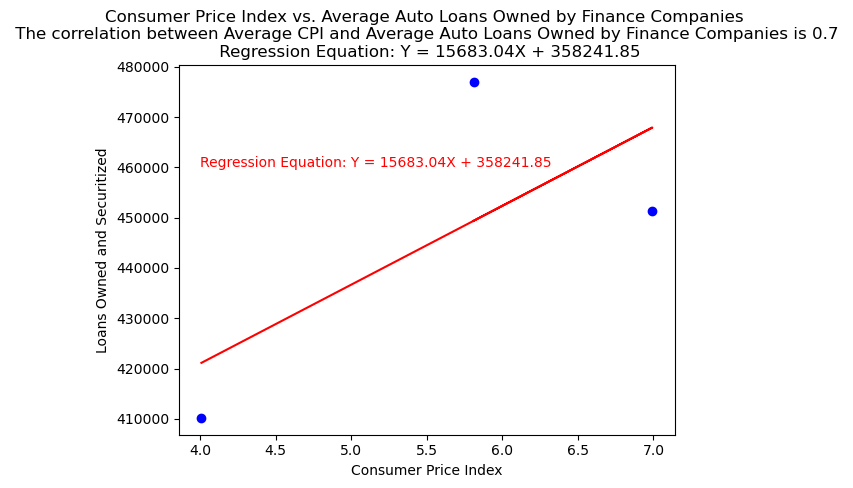

In [117]:
# Take the average of tumor and mouse weight in two separate variables
average_loans_owned = after_covid_df.groupby('Observation Date')['Loans Owned by Financial Companies'].mean()
average_cpi = after_covid_df.groupby('Observation Date')['Median CPI'].mean()

# Calculate the correlation coefficient 
correlation = (st.pearsonr(average_loans_owned,average_cpi)[0])
correlation = round(correlation, 2)

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(average_cpi, average_loans_owned, marker='o', color='blue')

# Create the linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(average_cpi, average_loans_owned)

# Create the regression line (y=mx+b)
regress_values = slope * average_cpi + intercept
plt.plot(average_cpi, regress_values, color='red')

equation_text = f"Regression Equation: Y = {round(slope, 2)}X + {round(intercept, 2)}"
plt.annotate(equation_text, (4,460000), fontsize=10, color="red")

# Set labels and title, include the correlation coefficient and regression equation
plt.xlabel('Consumer Price Index')
plt.ylabel('Loans Owned and Securitized')
plt.title(f'Consumer Price Index vs. Average Auto Loans Owned by Finance Companies \n The correlation between Average CPI and Average Auto Loans Owned by Finance Companies is {correlation} \n {equation_text}')

# Show the plot
plt.show()